## Cryptocurrency Market Analysis

***

In this project, three cryptocurrencies are analyzed using data from Yahoo Finance.\n

Pandas is used to extract the data, visualize the information, and analyze the risk of investment.\n

These questions are the focus of the analysis:
- What was the change of price over time?
- What was the daily return on average of a stock?
- What was the moving average of various stock?
- What is the correlation between daily returns of different stock?
- How much value do we put at risk by investing in a stock?
- How much can we attempt to predict future stock behavior?

In [5]:
#Python data analysis libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#Visualization libraries
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Data retrieval libraries
import pandas_datareader.data as pdr
from datetime import datetime

In [6]:
#A list of target cryptocurrencies
cc_list = ['BTC-USD', 'ETH-USD','LTC-USD']

In [7]:
#Sets the end date of the time series to the current date
end = datetime.today()

#Sets the start date of the time series to one year from the current date
start = datetime(end.year-1,end.month,end.day)

In [8]:
#Retrieves cryptocurrency data using Yahoo Finance      
BTC = pdr.DataReader('BTC-USD','yahoo',start,end)
ETH = pdr.DataReader('ETH-USD','yahoo',start,end)
LTC = pdr.DataReader('LTC-USD','yahoo',start,end)

In [9]:
BTC.describe()

,High,Low,Open,Close,Volume,Adj Close
count,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.000000
mean,49246.240250,46485.945243,47972.001211,47965.283843,4.348629e+10,47965.283843
std,9327.809332,9156.811689,9242.101445,9228.519786,2.393281e+10,9228.519786
min,31006.187500,28893.621094,29796.285156,29807.347656,1.464355e+10,29807.347656
25%,41549.493164,38484.603516,40062.786133,40060.935547,3.060305e+10,40060.935547
50%,49175.048828,46685.369141,47790.845703,47747.423828,3.787021e+10,47747.423828
75%,57766.944336,54282.181641,56168.667969,56187.017578,5.227154e+10,56187.017578
max,68789.625000,66382.062500,67549.734375,67566.828125,3.509679e+11,67566.828125


In [10]:
BTC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-03,37480.187500,35443.984375,35510.820312,37472.089844,6.116682e+10,37472.089844
2021-02-04,38592.175781,36317.500000,37475.105469,36926.066406,6.883807e+10,36926.066406
2021-02-05,38225.906250,36658.761719,36931.546875,38144.308594,5.859807e+10,38144.308594
2021-02-06,40846.546875,38138.386719,38138.386719,39266.011719,7.132603e+10,39266.011719
2021-02-07,39621.835938,37446.152344,39250.191406,38903.441406,6.550064e+10,38903.441406


In [11]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2021-02-03 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       366 non-null    float64
 1   Low        366 non-null    float64
 2   Open       366 non-null    float64
 3   Close      366 non-null    float64
 4   Volume     366 non-null    float64
 5   Adj Close  366 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


<hr>

## What is the change in stock's price over time?

<AxesSubplot:xlabel='Date'>

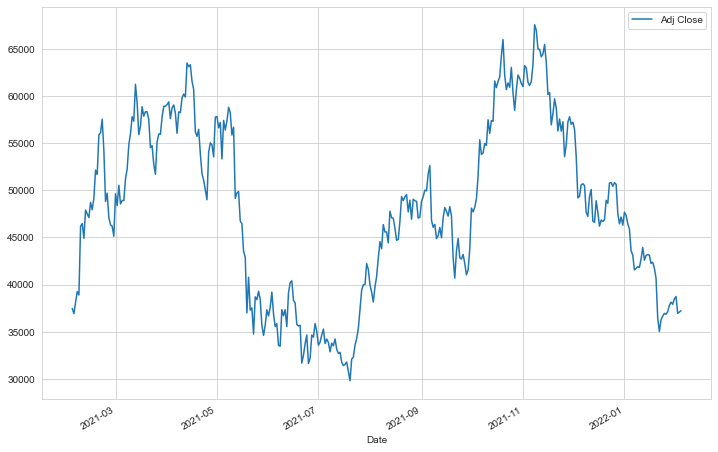

In [22]:
#Panda plot of the stocks adjusted closing price

BTC['Adj Close'].plot(legend = True, figsize=(12, 8))

Over the course of a year, the price of Bitcoin has returned to roughly the same value.

<AxesSubplot:xlabel='Date'>

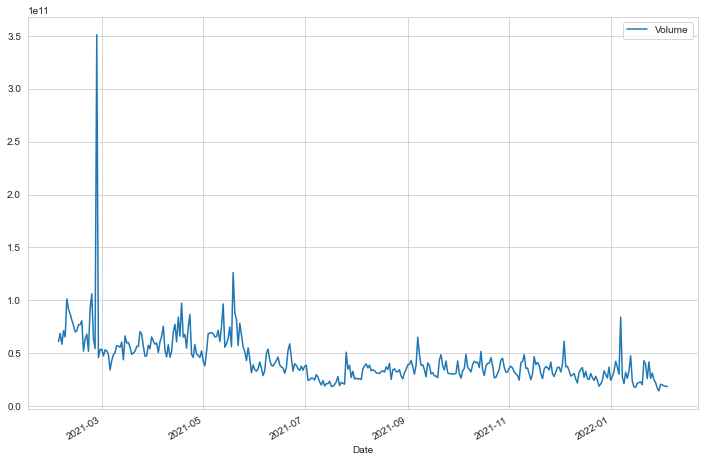

In [21]:
#Panda plot of the total volume being traded over time
BTC['Volume'].plot(legend=True,figsize=(12,8))

<hr>

## What was the moving average of the stocks?

In [24]:
#Using pandas we will create moving averages for 10, 20 and 50 day periods of time

ma_days = [10,20,50,100, 200]

for ma in ma_days:
    column_name = "MA %s days" %(str(ma))
    BTC[column_name] = BTC['Adj Close'].rolling(window=ma,center=False).mean()

In [44]:
BTC.tail()

,High,Low,Open,Close,Volume,Adj Close,MA 10 days,MA 20 days,MA 50 days,Daily Return,MA 100 days,MA 200 days
Date,,,,,,,,,,,,
2022-01-29,38576.261719,37406.472656,37780.714844,38138.179688,17194183075,38138.179688,37196.598828,39941.263281,44254.549531,0.009365,51549.111289,48813.163271
2022-01-30,38266.339844,37437.710938,38151.917969,37917.601562,14643548444,37917.601562,36920.317187,39746.080273,44025.651406,-0.005784,51321.364648,48838.639541
2022-01-31,38647.261719,36733.574219,37920.281250,38483.125000,20734730465,38483.125000,37122.898047,39533.443750,43793.347188,0.014915,51092.259727,48872.151514
2022-02-01,39115.132812,38113.664062,38481.765625,38743.273438,20288500328,38743.273438,37494.200391,39273.152344,43633.463047,0.006760,50870.384102,48908.760186
2022-02-02,38828.359375,37225.738281,38758.101562,37434.128906,18088411136,37434.128906,37609.932813,39015.280273,43449.892969,-0.033790,50614.327148,48938.265488


<AxesSubplot:xlabel='Date'>

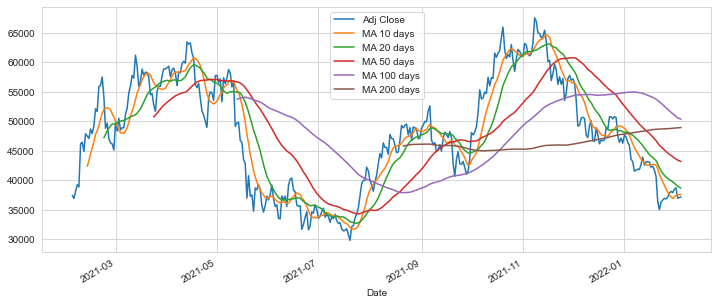

In [27]:
BTC[['Adj Close', 'MA 10 days', 'MA 20 days', 'MA 50 days', 'MA 100 days', 'MA 200 days']].plot(legend=True,figsize=(12,5))

<hr>

## What was the daily return average of a stock?

In [17]:
#In order to calculate the daily return we can use the percentage change of the adjusted closing price

BTC['Daily Return'] = BTC['Adj Close'].pct_change()
BTC['Daily Return'].tail()

Date
2022-01-29    0.009365
2022-01-30   -0.005784
2022-01-31    0.014915
2022-02-01    0.006760
2022-02-02   -0.033790
Name: Daily Return, dtype: float64

<AxesSubplot:xlabel='Date'>

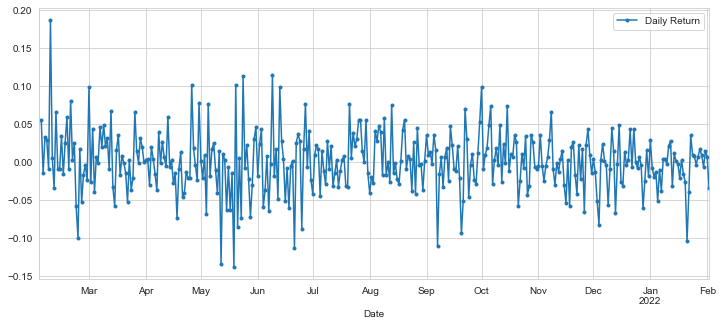

In [18]:
#Let us now plot the daily return
BTC['Daily Return'].plot(marker='.',legend = True, figsize=(12,5))

Text(9.550000000000004, 0.5, 'Frequency')

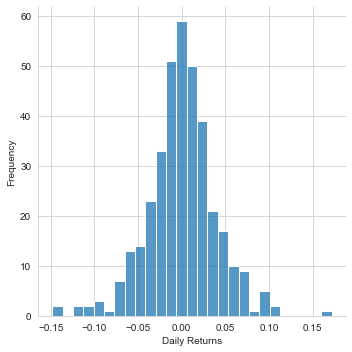

In [35]:
log_return = np.log(1 + BTC['Adj Close'].pct_change())

#Plot
sns.displot(log_return.iloc[1:])
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")

## What was the correlation between daily returns of different stocks?

In [20]:
#Let's read the 'Adj Close' column from the cryptocurrencies in this list
close_df = pdr.DataReader(cc_list, 'yahoo', start, end)['Adj Close']
close_df.tail()

Symbols,BTC-USD,ETH-USD,LTC-USD
Date,,,
2022-01-30,37917.601562,2603.466553,108.799858
2022-01-31,38483.125000,2688.278809,109.587700
2022-02-01,38743.273438,2792.117188,115.402000
2022-02-02,36952.984375,2682.854004,108.556023
2022-02-03,36893.335938,2660.002930,108.015884


In [22]:
#Let's explore the returns again using the percentage change from the adj close.
returns_df = close_df.pct_change()
returns_df.tail()

Symbols,BTC-USD,ETH-USD,LTC-USD
Date,,,
2022-01-30,-0.005784,0.002457,-0.018262
2022-01-31,0.014915,0.032577,0.007241
2022-02-01,0.006760,0.038626,0.053056
2022-02-02,-0.046209,-0.039133,-0.059323
2022-02-03,-0.001614,-0.008517,-0.004976


<AxesSubplot:xlabel='Date'>

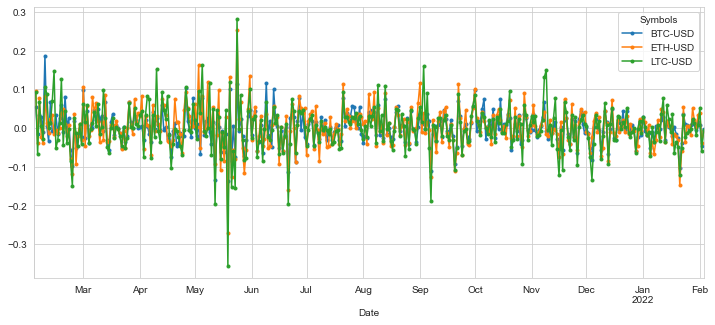

In [23]:
returns_df.plot(marker='.', legend = True, figsize=(12, 5))

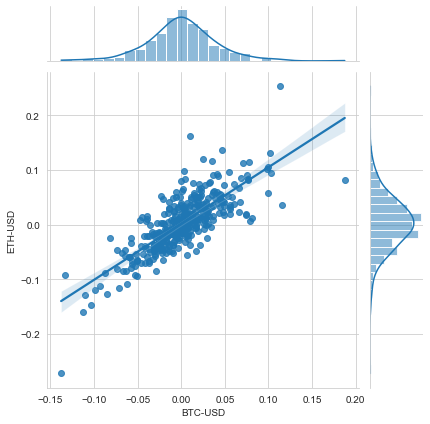

In [52]:
sns.jointplot(x = 'BTC-USD', y = 'ETH-USD', data = returns_df, kind = 'reg')

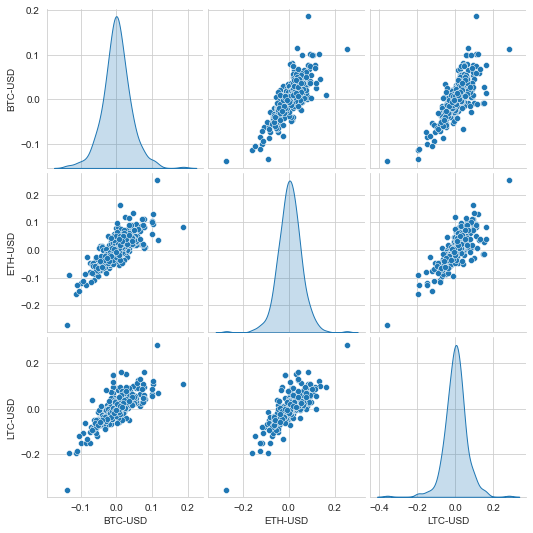

In [27]:
sns.pairplot(returns_df.dropna(), diag_kind = 'kde')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

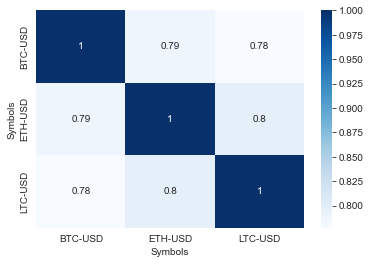

In [28]:
corr = returns_df.dropna().corr()
sns.heatmap(corr, 
            xticklabels = corr.columns, 
            yticklabels = corr.columns, 
            annot = True, 
            cmap = 'Blues')

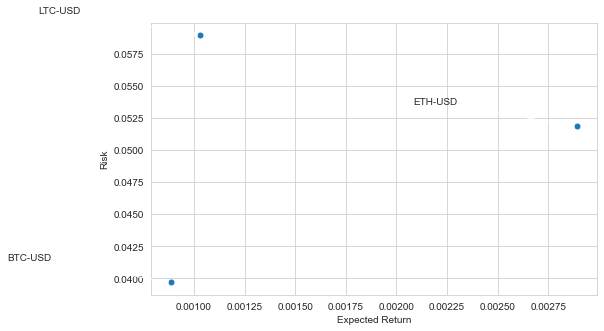

In [29]:
rets = returns_df.dropna()

plt.figure(figsize = (8, 5))
plt.scatter(rets.mean(), rets.std(), s = 25)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, 
                 xy = (x, y), 
                 xytext = (-120, 20), 
                 textcoords = 'offset points', 
                 ha = 'right', va = 'bottom', 
                 arrowprops = dict(arrowstyle = '->'))

In [30]:
rets.head()

Symbols,BTC-USD,ETH-USD,LTC-USD
Date,,,
2021-02-03,0.055246,0.096170,0.091961
2021-02-04,-0.014571,-0.039826,-0.067243
2021-02-05,0.032991,0.077684,0.066856
2021-02-06,0.029407,-0.023742,0.005570
2021-02-07,-0.009234,-0.037917,-0.029378


In [32]:
qt = rets['BTC-USD'].quantile(0.05)

qt_pct = abs(rets["BTC-USD"].quantile(0.05)) * 100

In [33]:
print("The 0.05 empirical quantile of daily returns is at {0:.2f}.".format(qt))
print("This means that with 95% confidence, the worst daily loss will not exceed {0:.2f}% (of the investment).".format(qt_pct))

The 0.05 empirical quantile of daily returns is at -0.06.
This means that with 95% confidence, the worst daily loss will not exceed 6.20% (of the investment).


## How can we predict future behavior?

In [34]:
days = 365
dt = 1 / 365
mu = rets.mean()['BTC-USD']
sigma = rets.std()['BTC-USD']

In [35]:
#Monte Carlo function
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [36]:
BTC.tail()

,High,Low,Open,Close,Volume,Adj Close,MA 10 days,MA 20 days,MA 50 days,Daily Return
Date,,,,,,,,,,
2022-01-29,38576.261719,37406.472656,37780.714844,38138.179688,17194183075,38138.179688,37196.598828,39941.263281,44254.549531,0.009365
2022-01-30,38266.339844,37437.710938,38151.917969,37917.601562,14643548444,37917.601562,36920.317187,39746.080273,44025.651406,-0.005784
2022-01-31,38647.261719,36733.574219,37920.281250,38483.125000,20734730465,38483.125000,37122.898047,39533.443750,43793.347188,0.014915
2022-02-01,39115.132812,38113.664062,38481.765625,38743.273438,20288500328,38743.273438,37494.200391,39273.152344,43633.463047,0.006760
2022-02-02,38828.359375,37225.738281,38758.101562,37434.128906,18088411136,37434.128906,37609.932813,39015.280273,43449.892969,-0.033790


Text(0.5, 1.0, 'Monte Carlo Analysis for BTC')

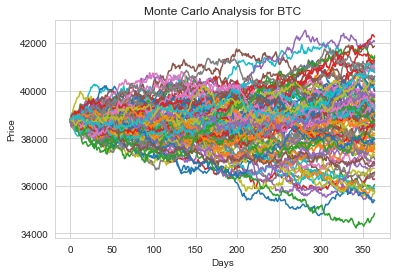

In [38]:
start_price = 38758.101562 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for BTC')

In [39]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

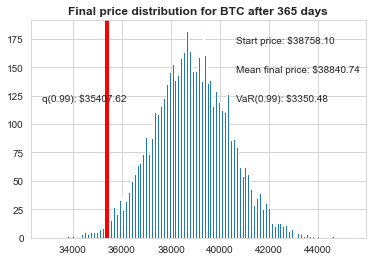

In [42]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for BTC after %s days" %days, weight='bold')
plt.show()

After 10,000 runs it seems like BTC is going up with a starting price of $38758 and a mean final price of $38840.